In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pandas as pd
from glob import glob
from RaTag.scripts.wfm2read_fast import wfm2read


In [98]:
path = '/Users/pabloherrero/sabat/RaTagging/RaTag/scope_data/waveforms/noSCA/'
files = sorted(glob(path + '*.wfm'))
y_full, t_full, info, ind_over, ind_under = wfm2read(files[0], step=0.001)


Reading 9999999 data points from /Users/pabloherrero/sabat/RaTagging/RaTag/scope_data/waveforms/noSCA/27052025_noSCA_100Wfm.wfm starting at index 0 with step 0.001


[(0.0, 8e-08)]

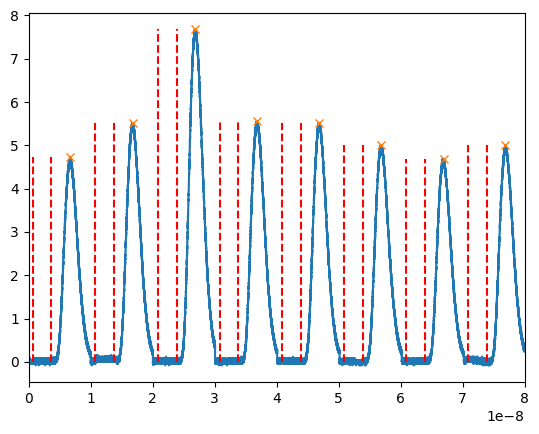

In [ ]:
tp = t_full[t_full > 0]
t = tp[tp < 8e-8]
y = y_full[:len(t)]

peaks, props = find_peaks(y, height=1, distance=1000, prominence=1)
plt.plot(t, y, label='Waveform')
plt.plot(t[peaks], y[peaks], 'x', label='Peaks')
plt.vlines(t[peaks-3000], 0, y[peaks], color='red', linestyles='dashed', label='Peak Heights')
plt.vlines(t[peaks-6000], 0, y[peaks], color='red', linestyles='dashed', label='Peak Heights')

plt.gca().set(xlim=(0, 8e-8))

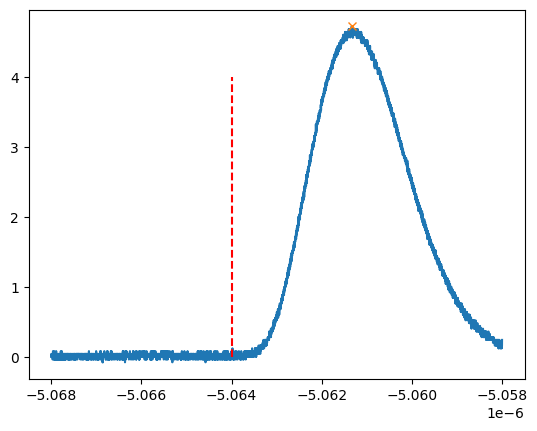

In [ ]:
# tp = t_full[t_full > 0]
# t = t_full[t_full < -5.0579e-6]
t = t_full[:10000]
y = y_full[:len(t)]

peaks, props = find_peaks(y, height=1, distance=1000, prominence=1)
plt.plot(t, y, label='Waveform')
plt.plot(t[peaks], y[peaks], 'x', label='Peaks')
# plt.vlines(t[peaks-6000], 0, y[peaks], color='red', linestyles='dashed', label='Peak Heights')

# plt.gca().set(xlim=(0, 8e-8))

In [91]:
baseline = [np.mean(y[cd:cu]) for cd, cu in zip(cutdown_window, cutup_window)]
baseline

[0.013666552225748602,
 0.0571732188924153,
 0.019893218892415278,
 0.01429321889241527,
 0.02138655222574861,
 0.008319885559081933,
 0.010453218892415267,
 0.025053218892415283]

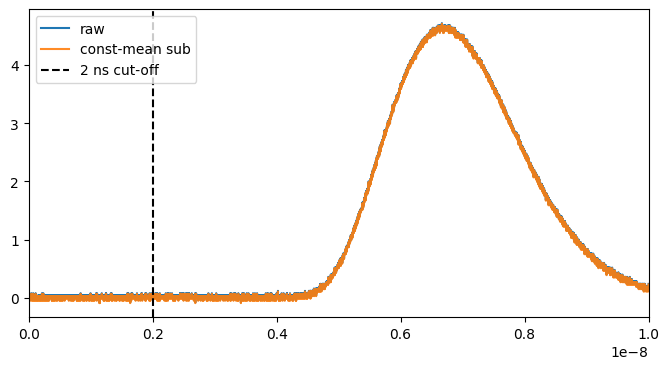

In [26]:
# define baseline region (first 2 ns → 0.2e-8 s)
baseline_mask = t <= 0.2e-8

# 1) constant offset from mean of first 2 ns
baseline_mean = np.mean(y[baseline_mask])
y_const_corr = y - baseline_mean

# 2) (optional) linear‐fit baseline over that same region
coeffs_bl = np.polyfit(t[baseline_mask], y[baseline_mask], 1)
baseline_lin = np.polyval(coeffs_bl, t)
y_lin_corr = y - baseline_lin

# plot
plt.figure(figsize=(8,4))
plt.plot(t, y,          label='raw')
# plt.plot(t, y_lin_corr,  alpha=0.5, label='linear‐fit sub')
plt.plot(t, y_const_corr, alpha=0.9, label='const‐mean sub')
plt.axvline(0.2e-8, color='k', ls='--', label='2 ns cut-off')
plt.legend()
plt.gca().set(xlim=(0,1e-8))#, ylim=(-0.1, 0.1), )
plt.show()

[(0.0, 1e-08)]

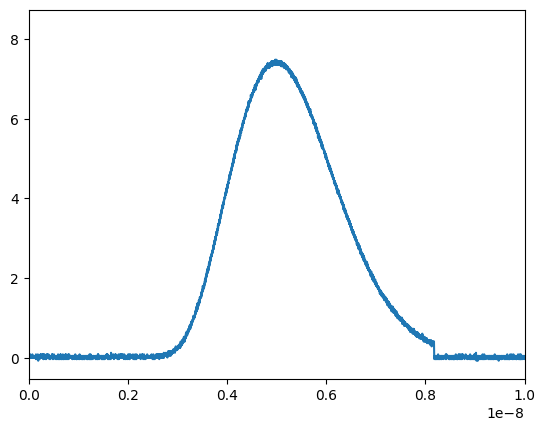

In [5]:
plt.plot(t, y, label='Waveform')
plt.gca().set(xlim=(0, 1e-8))